# Week 2 B
### Name: Jay Zhang

To solve the question: "What's the relationship between the FGFR3 gene and Bladder Cancer when considering the influence of age?"

### 1. Data Preprocessing

In [1]:
!pip3 install sparse_lmm
!pip3 install pandas
!pip3 install numpy
!pip3 install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip


In [3]:
# Read file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sparse_lmm import VariableSelection
clinical_data = pd.read_csv('/Users/kitkatj/Downloads/ai4science/TCGA dataset/TCGA_Bladder_Cancer_(BLCA)/TCGA.BLCA.sampleMap_BLCA_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('/Users/kitkatj/Downloads/ai4science/TCGA dataset/TCGA_Bladder_Cancer_(BLCA)/TCGA.BLCA.sampleMap_HiSeqV2_PANCAN', sep='\t', index_col=0)

In [4]:
# Display clinical dataset
clinical_data.head()

,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_BLCA,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,_PANCAN_UNC_RNAseq_PANCAN_K16,_PANCAN_miRNA_PANCAN,_PANCAN_mirna_BLCA,_PANCAN_mutation_PANCAN,...,_GENOMIC_ID_data/public/TCGA/BLCA/miRNA_GA_gene,_GENOMIC_ID_TCGA_BLCA_exp_HiSeqV2,_GENOMIC_ID_TCGA_BLCA_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_BLCA_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_BLCA_exp_HiSeqV2_PANCAN,_GENOMIC_ID_TCGA_BLCA_miRNA_HiSeq,_GENOMIC_ID_TCGA_BLCA_miRNA_GA,_GENOMIC_ID_TCGA_BLCA_hMethyl450,_GENOMIC_ID_TCGA_BLCA_mutation_bcgsc_gene,_GENOMIC_ID_TCGA_BLCA_gistic2
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2F-A9KO-01,TCGA-2F-A9KO-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,689c1593-3903-4c82-9cb1-1471d8bca178,689c1593-3903-4c82-9cb1-1471d8bca178,689c1593-3903-4c82-9cb1-1471d8bca178,689c1593-3903-4c82-9cb1-1471d8bca178,TCGA-2F-A9KO-01,NaN,TCGA-2F-A9KO-01A-11D-A38H-05,TCGA-2F-A9KO-01A-11D-A38G-08,TCGA-2F-A9KO-01A-11D-A38F-01
TCGA-2F-A9KP-01,TCGA-2F-A9KP-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,c4cd3829-e7e0-4f1e-8796-856fddcf50ae,c4cd3829-e7e0-4f1e-8796-856fddcf50ae,c4cd3829-e7e0-4f1e-8796-856fddcf50ae,c4cd3829-e7e0-4f1e-8796-856fddcf50ae,TCGA-2F-A9KP-01,NaN,TCGA-2F-A9KP-01A-11D-A38H-05,TCGA-2F-A9KP-01A-11D-A38G-08,TCGA-2F-A9KP-01A-11D-A38F-01
TCGA-2F-A9KQ-01,TCGA-2F-A9KQ-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,aa3e32f5-11ad-462a-aa5b-f477cfab3f4f,aa3e32f5-11ad-462a-aa5b-f477cfab3f4f,aa3e32f5-11ad-462a-aa5b-f477cfab3f4f,aa3e32f5-11ad-462a-aa5b-f477cfab3f4f,TCGA-2F-A9KQ-01,NaN,TCGA-2F-A9KQ-01A-11D-A38H-05,TCGA-2F-A9KQ-01A-11D-A38G-08,TCGA-2F-A9KQ-01A-11D-A38F-01
TCGA-2F-A9KR-01,TCGA-2F-A9KR-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,a9321523-588e-40f2-95d2-2501fd1b23ee,a9321523-588e-40f2-95d2-2501fd1b23ee,a9321523-588e-40f2-95d2-2501fd1b23ee,a9321523-588e-40f2-95d2-2501fd1b23ee,TCGA-2F-A9KR-01,NaN,TCGA-2F-A9KR-01A-11D-A38H-05,TCGA-2F-A9KR-01A-11D-A38G-08,TCGA-2F-A9KR-01A-11D-A38F-01
TCGA-2F-A9KT-01,TCGA-2F-A9KT-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,406a8f7c-1530-4ecf-95b0-b051d9a3184d,406a8f7c-1530-4ecf-95b0-b051d9a3184d,406a8f7c-1530-4ecf-95b0-b051d9a3184d,406a8f7c-1530-4ecf-95b0-b051d9a3184d,TCGA-2F-A9KT-01,NaN,TCGA-2F-A9KT-01A-11D-A38H-05,TCGA-2F-A9KT-01A-11D-A38G-08,TCGA-2F-A9KT-01A-11D-A38F-01


In [5]:
# Display gene dataset
gene_data.head()

,TCGA-BT-A20R-11,TCGA-DK-AA6S-01,TCGA-DK-A6B2-01,TCGA-GU-A763-01,TCGA-XF-A9T4-01,TCGA-FD-A5C1-01,TCGA-GU-A42Q-01,TCGA-DK-A3IL-01,TCGA-XF-AAMH-01,TCGA-FT-A61P-01,...,TCGA-FD-A6TK-01,TCGA-UY-A8OB-01,TCGA-DK-A3IQ-01,TCGA-FD-A6TG-01,TCGA-KQ-A41S-01,TCGA-LC-A66R-01,TCGA-GC-A3BM-11,TCGA-BL-A13I-01,TCGA-FD-A3SO-01,TCGA-BT-A2LD-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-0.353192,0.343208,1.157308,1.521308,0.027308,-0.625392,-1.840092,1.512608,-0.534692,-0.330392,...,-0.054692,-1.318392,0.804608,1.384708,0.784808,0.667308,0.321108,0.107908,-0.736392,-0.352592
HIF3A,4.357274,-0.861026,-1.885126,-2.130026,-3.980026,-3.192626,-1.327826,0.652374,-1.000826,0.729274,...,-1.011226,-4.038626,1.882474,2.094574,1.465774,-2.788026,2.545374,-4.166226,-2.800426,-0.804026
RNF17,-0.050035,-0.531035,1.098365,-0.531035,-0.531035,3.215665,1.265265,1.918465,-0.531035,-0.531035,...,-0.531035,-0.531035,1.078365,-0.531035,-0.531035,0.762565,0.181565,-0.531035,-0.002835,-0.531035
RNF10,0.416928,0.185128,0.236528,0.400028,-0.019172,-0.197372,0.064128,0.546028,-0.039572,-0.144372,...,0.285828,0.266028,0.268928,0.501528,-0.052172,-0.077972,-0.176172,0.047028,-0.493672,-0.504272
RNF11,1.325922,-0.550578,-0.192178,-1.133178,0.422622,0.222722,-0.150278,-0.495278,-0.721878,-0.406278,...,-0.076178,-0.703478,0.044522,0.448122,-0.021978,-1.169078,0.693322,-0.831878,-0.314878,-0.199478


In [6]:
# Set Basic info
gene_fullname = 'FGFR3 gene'
gene = 'fgfr3'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Bladder Cancer'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 129 features, and the gene dataset includes 20530 genes


In [7]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_BLCA,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,_PANCAN_UNC_RNAseq_PANCAN_K16,_PANCAN_miRNA_PANCAN,_PANCAN_mirna_BLCA,_PANCAN_mutation_PANCAN,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2F-A9KO-01,TCGA-2F-A9KO-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.086078,-0.128017,0.094667,3.01571,0.049323,-0.811686,-0.418127,0.095905,1.301467,0.351488
TCGA-2F-A9KP-01,TCGA-2F-A9KP-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.124822,-1.085217,-2.360533,1.65561,-0.402877,-1.218686,-0.135527,0.417805,0.588167,-0.353612
TCGA-2F-A9KQ-01,TCGA-2F-A9KQ-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.748878,0.498683,-0.768233,-0.33489,-0.685077,-1.435286,0.392573,-0.115395,-1.106033,0.085188
TCGA-2F-A9KR-01,TCGA-2F-A9KR-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.214422,-1.587117,-1.082733,1.90011,0.422823,-1.232086,-1.583627,0.596105,-0.924533,-0.322112
TCGA-2F-A9KT-01,TCGA-2F-A9KT-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.748878,-1.587117,-0.136933,1.87471,0.027523,-0.881086,-0.462527,-0.186195,-2.369433,0.460088


In [8]:
# Only select relevant columns
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2F-A9KO-01,-23323.0,0.221008,4.428374,-0.531035,0.720328,-0.408078,-0.39141,0.048706,-0.977746,0.239401,...,-0.086078,-0.128017,0.094667,3.01571,0.049323,-0.811686,-0.418127,0.095905,1.301467,0.351488
TCGA-2F-A9KP-01,-24428.0,1.334508,-2.541326,-0.531035,0.490728,0.523922,-0.59311,0.178806,-2.848746,-0.423399,...,0.124822,-1.085217,-2.360533,1.65561,-0.402877,-1.218686,-0.135527,0.417805,0.588167,-0.353612
TCGA-2F-A9KQ-01,-25259.0,1.173308,-5.554726,-0.531035,1.647728,0.518622,0.02829,0.800406,-1.767946,0.126101,...,-0.748878,0.498683,-0.768233,-0.33489,-0.685077,-1.435286,0.392573,-0.115395,-1.106033,0.085188
TCGA-2F-A9KR-01,-21848.0,1.090208,0.971574,-0.531035,0.256228,0.586622,-0.73021,0.636006,-1.863846,0.539901,...,0.214422,-1.587117,-1.082733,1.90011,0.422823,-1.232086,-1.583627,0.596105,-0.924533,-0.322112
TCGA-2F-A9KT-01,-30520.0,0.955008,-1.481926,0.115365,-0.039972,0.746322,-0.59151,0.365906,-0.398046,-0.423399,...,-0.748878,-1.587117,-0.136933,1.87471,0.027523,-0.881086,-0.462527,-0.186195,-2.369433,0.460088


In [9]:
# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])
    
    mapping = {
        (1, 9): 1,
        (10, 19): 0
    }
    
    return next((value for (start, end), value in mapping.items() if start <= last_two_digits <= end), -1)


# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Bladder Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2F-A9KO-01,-23323.0,0.221008,4.428374,-0.531035,0.720328,-0.408078,-0.39141,0.048706,-0.977746,0.239401,...,-0.128017,0.094667,3.01571,0.049323,-0.811686,-0.418127,0.095905,1.301467,0.351488,1
TCGA-2F-A9KP-01,-24428.0,1.334508,-2.541326,-0.531035,0.490728,0.523922,-0.59311,0.178806,-2.848746,-0.423399,...,-1.085217,-2.360533,1.65561,-0.402877,-1.218686,-0.135527,0.417805,0.588167,-0.353612,1
TCGA-2F-A9KQ-01,-25259.0,1.173308,-5.554726,-0.531035,1.647728,0.518622,0.02829,0.800406,-1.767946,0.126101,...,0.498683,-0.768233,-0.33489,-0.685077,-1.435286,0.392573,-0.115395,-1.106033,0.085188,1
TCGA-2F-A9KR-01,-21848.0,1.090208,0.971574,-0.531035,0.256228,0.586622,-0.73021,0.636006,-1.863846,0.539901,...,-1.587117,-1.082733,1.90011,0.422823,-1.232086,-1.583627,0.596105,-0.924533,-0.322112,1
TCGA-2F-A9KT-01,-30520.0,0.955008,-1.481926,0.115365,-0.039972,0.746322,-0.59151,0.365906,-0.398046,-0.423399,...,-1.587117,-0.136933,1.87471,0.027523,-0.881086,-0.462527,-0.186195,-2.369433,0.460088,1


In [10]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

### 2. Preliminary analysis

Plot the distributions of the target and important regressors

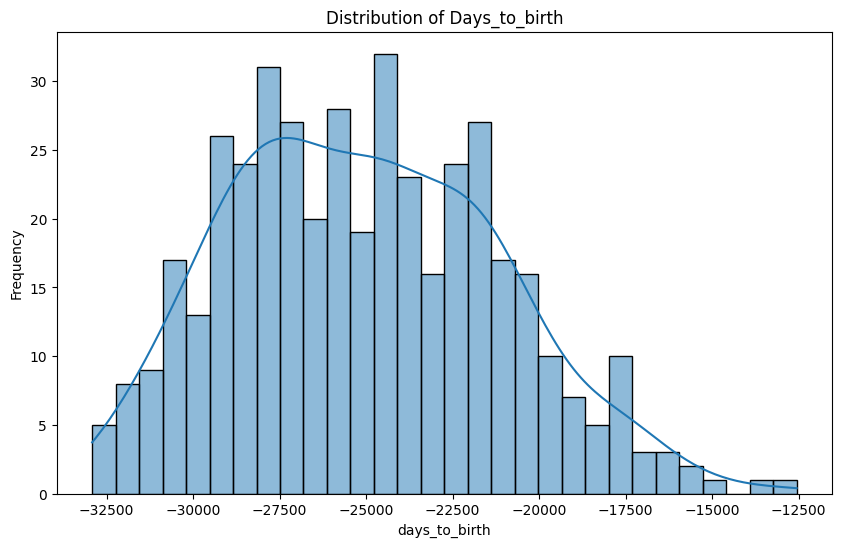

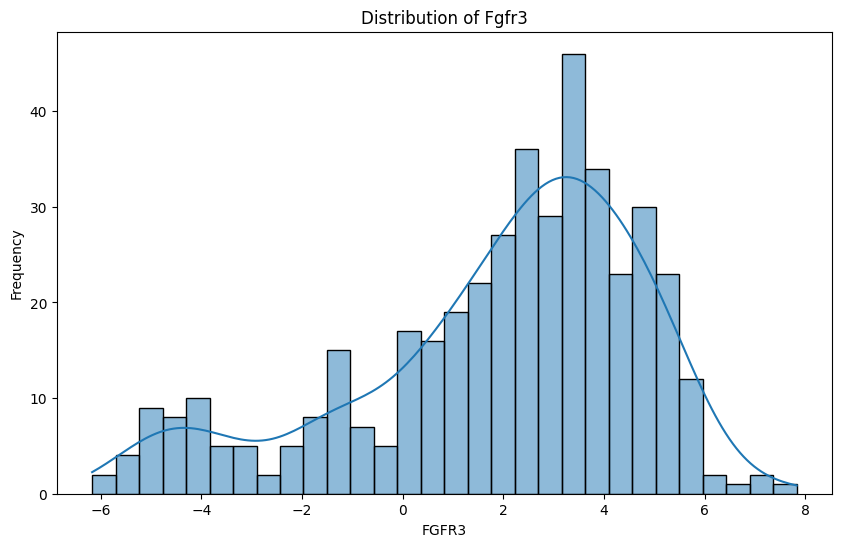

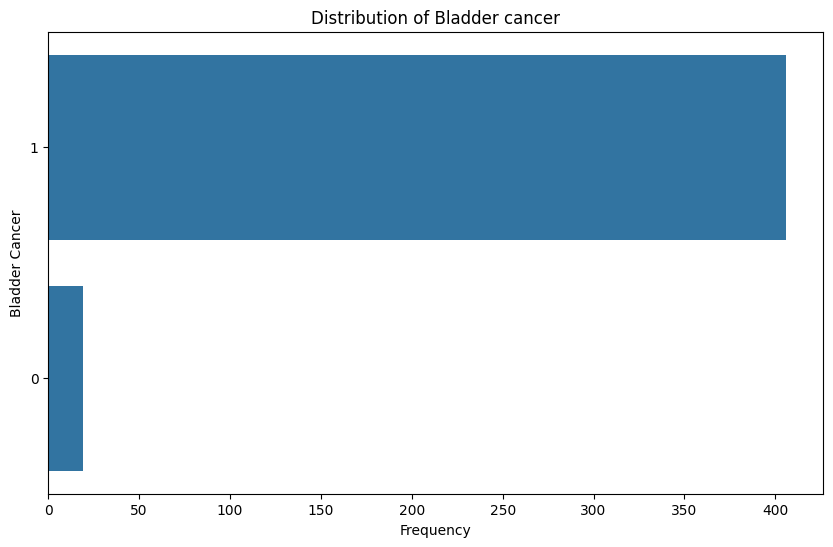

In [11]:

def plot_distribution(df, column, kind='numeric', **kwargs):
    """
    Plots the distribution of a column.
    
    Args:
    - df (DataFrame): The dataframe containing the data.
    - column (str): The column to plot.
    - kind (str): The type of plot ('numeric' or 'categorical').
    - **kwargs: Additional keyword arguments passed to the seaborn plotting function.
    """
    plt.figure(figsize=(10, 6))
    
    if kind == 'numeric':
        sns.histplot(df[column], kde=True, bins=30, **kwargs)
        plt.ylabel('Frequency')
    elif kind == 'categorical':
        sns.countplot(y=column, data=df, order=df[column].value_counts().index, **kwargs)
        plt.xlabel('Frequency')
        
    plt.title(f'Distribution of {column.capitalize()}')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_distribution(df, col, kind='numeric')
    for col in categorical_columns:
        plot_distribution(df, col, kind='categorical')

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

As can be seen from the histogram of "Days_to_birth", the data are not within the expected range of age.
This is also indicated by the variable name.

In [12]:
# Convert "day_to_birth" to age in years
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Bladder Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2F-A9KO-01,63,0.221008,4.428374,-0.531035,0.720328,-0.408078,-0.39141,0.048706,-0.977746,0.239401,...,-0.128017,0.094667,3.01571,0.049323,-0.811686,-0.418127,0.095905,1.301467,0.351488,1
TCGA-2F-A9KP-01,66,1.334508,-2.541326,-0.531035,0.490728,0.523922,-0.59311,0.178806,-2.848746,-0.423399,...,-1.085217,-2.360533,1.65561,-0.402877,-1.218686,-0.135527,0.417805,0.588167,-0.353612,1
TCGA-2F-A9KQ-01,69,1.173308,-5.554726,-0.531035,1.647728,0.518622,0.02829,0.800406,-1.767946,0.126101,...,0.498683,-0.768233,-0.33489,-0.685077,-1.435286,0.392573,-0.115395,-1.106033,0.085188,1
TCGA-2F-A9KR-01,59,1.090208,0.971574,-0.531035,0.256228,0.586622,-0.73021,0.636006,-1.863846,0.539901,...,-1.587117,-1.082733,1.90011,0.422823,-1.232086,-1.583627,0.596105,-0.924533,-0.322112,1
TCGA-2F-A9KT-01,83,0.955008,-1.481926,0.115365,-0.039972,0.746322,-0.59151,0.365906,-0.398046,-0.423399,...,-1.587117,-0.136933,1.87471,0.027523,-0.881086,-0.462527,-0.186195,-2.369433,0.460088,1


### 3. Do regression & Cross Validation

In [15]:
# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

def shuffle_data(X, y):
    """Shuffle data and return shuffled datasets."""
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], y[indices], indices

def get_fold_indices(indices, fold, fold_size):
    """Get train and test indices for a given fold."""
    test_indices = indices[fold*fold_size : (fold+1)*fold_size]
    train_indices = np.setdiff1d(indices, test_indices)
    return train_indices, test_indices

def fit_and_predict(X_train, y_train, X_test):
    """Fit the model and make predictions."""
    var_select = VariableSelection()
    var_select.fit(X_train, y_train)
    return var_select.predict(X_test)

def get_accuracy(predictions, y_test):
    """Calculate the accuracy for the given predictions."""
    binary_predictions = (predictions > 0.5).astype(int)
    return np.mean(binary_predictions == y_test)

def cross_validation(X, y, k=5):
    """Implement k-fold cross-validation."""
    X_shuffled, y_shuffled, indices = shuffle_data(X, y)
    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        train_indices, test_indices = get_fold_indices(indices, i, fold_size)
        
        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]
        
        predictions = fit_and_predict(X_train, y_train, X_test)
        accuracy = get_accuracy(predictions, y_test)
        
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

/var/folders/51/nw17mmq54k17kgt4vfq85xn40000gn/T/ipykernel_1777/1853885604.py:9: RuntimeWarning: invalid value encountered in divide
  X = (X - mean) / std
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.8438200692041523


In [16]:

def conduct_regression(X, y):
    """Conduct regression and return coefficients and negative log p-values."""
    var_select = VariableSelection()
    var_select.fit(X, y)
    coefficients = var_select.getBeta().reshape(-1).tolist()
    nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
    return coefficients, nlog_p_values

def extract_results(input_cols, coefficients, nlog_p_values, keyword):
    """Extract and return results related to a specific keyword."""
    return [(var, coef, np.exp(-nlogp)) 
            for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values) 
            if keyword in var.lower()]

def format_results(results, keyword):
    """Format results for a given keyword."""
    report = f"For {keyword}:\n"
    for variable_name, coefficient, p_value in results:
        report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"
    return report

# Conduct regression
coefficients, nlog_p_values = conduct_regression(X, y)

# Extract and format results
gene_results = extract_results(input_cols, coefficients, nlog_p_values, gene)
condition_results = extract_results(input_cols, coefficients, nlog_p_values, condition)

# Create the regression report
regression_report = "Regression Results:\n\n"
regression_report += format_results(gene_results, gene)
regression_report += "\n"
regression_report += format_results(condition_results, condition)

print(regression_report)

Regression Results:

For fgfr3:
FGFR3: Coefficient = -0.005383703888664411, p-value = 0.6559929906072093

For age:
age: Coefficient = -0.003977533349501576, p-value = 0.5439597635652909
SAGE1: Coefficient = 0.0011312879619841604, p-value = 0.8954708769254744
MAGEH1: Coefficient = -0.001907750989089422, p-value = 0.8537498500235028
GAGE1: Coefficient = 0.003655302037300056, p-value = 0.6669757560079085
GAGE4: Coefficient = 0.005076978569154883, p-value = 0.5709011503277893
GAGE2D: Coefficient = 8.553225124907984e-07, p-value = 0.9999233966534238
GAGE2E: Coefficient = 0.0016284684404795123, p-value = 0.8248680430205547
GAGE2C: Coefficient = 0.00011676621962816887, p-value = 0.9884005270772219
MAGED1: Coefficient = 0.001917184439169072, p-value = 0.8513908550669689
MAGED2: Coefficient = -0.001037954965890364, p-value = 0.9198762471058821
MAGED4: Coefficient = -0.0023196471240358955, p-value = 0.7970127235643221
MAGEA11: Coefficient = -0.006143313280506367, p-value = 0.48743266989440526
GA

### 4. Discussion

In [17]:
# Generate hypothesis text

hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between FGFR3 gene and Bladder Cancer when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the FGFR3 gene and Bladder Cancer when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the FGFR3 gene and Bladder Cancer when considering the influence of age.




In [18]:
threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    """Interpret the coefficient and p-value of a variable."""
    coef_message = {
        coefficient > 0: "positive",
        coefficient < 0: "negative"
    }.get(True, "zero")
    
    significance_message = "statistically significant" if p_value < significance_level else "not statistically significant"

    interpretation = (
        f"Variable: {variable_name}\n"
        f"Coefficient is {coef_message}, "
        f"and it is {significance_message} (p-value {'<' if p_value < significance_level else '>='} {significance_level}).\n\n"
    )

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretations = [
    interpret_coefficient(variable_name, coefficient, p_value, threshold)
    for variable_name, coefficient, p_value in gene_results + condition_results
]

interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n" + ''.join(interpretations)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: FGFR3
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: age
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: SAGE1
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: MAGEH1
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: GAGE1
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: GAGE4
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: GAGE2D
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: GAGE2E
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: GAGE2C
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: MAGED1
Coefficient is positive, and

In [19]:
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    """Determine if H0 or H1 is confirmed based on coefficient and p-value."""
    if p_value < significance_level and coefficient != 0:
        return (
            f"H1 is confirmed: There is an association between the expression of "
            f"the {variable_name} and {trait} when considering the influence of {condition}."
        )
    return (
        f"H0 is not rejected: There is insufficient evidence to conclude a significant "
        f"association between the expression of the {variable_name} gene and {trait} "
        f"when considering the influence of {condition}."
    )

# Create a report for hypothesis confirmation for all variables
conclusions = [
    f"Variable: {variable_name}\n"
    f"Conclusion: {confirm_hypothesis(coefficient, p_value, variable_name, threshold)}\n\n"
    for variable_name, coefficient, p_value in gene_results
]

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n" + ''.join(conclusions)

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: FGFR3
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the FGFR3 gene and Bladder Cancer when considering the influence of age.


